In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import pickle
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
mean_img = np.load('mean.npy')

In [21]:
def rescaler(img):
    low, high = np.min(img), np.max(img)
    return 255*(img - low) / (high - low)

def show(image, rescale=False, add_mean=True, clip=False):
    img = image.copy()
    img = img.transpose(1,2,0)

    if add_mean:
        img += mean_img.reshape(64,64,3)
    if rescale:
        img = rescaler(img)
    if clip is True:
        img = np.clip(img, 0, 255)
    return img

In [7]:
fast_grad_images = pickle.load(open('./data/tiny_foolers_fast/tiny_foolers_fast.p', 'rb'), encoding='latin1')
iter_grad_images = pickle.load(open('./data/tiny_foolers/tiny_foolers.p', 'rb'), encoding='latin1')

fast_grad_images_keys = fast_grad_images.keys()
iter_grad_images_keys = iter_grad_images.keys()

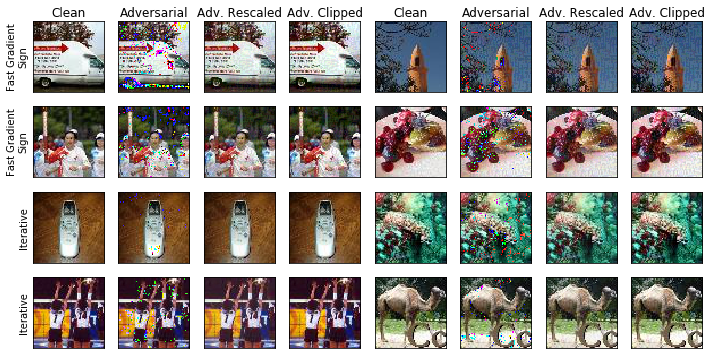

In [46]:
with PdfPages('clipping.pdf') as pdf:
    fig = plt.figure(1, (12, 24))

    rows, cols = 4, 8

    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(rows, cols),
                     axes_pad=0.2,  # pad between axes in inch.
                     )

    grid[0].axes.set_ylabel('Fast Gradient\nSign')
    grid[cols].axes.set_ylabel('Fast Gradient\nSign')
    for i in range(0,2*cols,4):
        k = np.random.choice(list(fast_grad_images_keys))
        image = fast_grad_images[k][4][0]
        image_fool = fast_grad_images[k][3][0]
        for j in range(i,i+4):
            grid[j].axes.xaxis.set_ticklabels([])
            grid[j].axes.yaxis.set_ticklabels([])
            grid[j].axes.xaxis.set_ticks([])
            grid[j].axes.yaxis.set_ticks([])

        if i == 0 or i == 4:
            grid[i].axes.set_title('Clean')
            grid[i+1].axes.set_title('Adversarial')
            grid[i+2].axes.set_title('Adv. Rescaled')
            grid[i+3].axes.set_title('Adv. Clipped')
        
        grid[i].imshow(show(image).astype('uint8'))
        grid[i+1].imshow(show(image_fool).astype('uint8'))
        grid[i+2].imshow(show(image_fool, rescale=True).astype('uint8'))
        grid[i+3].imshow(show(image_fool, clip=True).astype('uint8'))

    
    grid[2*cols].axes.set_ylabel('Iterative')
    grid[3*cols].axes.set_ylabel('Iterative')
    for i in range(2*cols,4*cols,4):
        k = np.random.choice(list(iter_grad_images_keys))
        image = iter_grad_images[k][4][0]
        image_fool = iter_grad_images[k][3][0]
        for j in range(i,i+4):
            grid[j].axes.xaxis.set_ticklabels([])
            grid[j].axes.yaxis.set_ticklabels([])
            grid[j].axes.xaxis.set_ticks([])
            grid[j].axes.yaxis.set_ticks([])

        grid[i].imshow(show(image).astype('uint8'))
        grid[i+1].imshow(show(image_fool).astype('uint8'))
        grid[i+2].imshow(show(image_fool, rescale=True).astype('uint8'))
        grid[i+3].imshow(show(image_fool, clip=True).astype('uint8'))

    pdf.savefig(fig, bbox_inches='tight', pad_inches=0)